In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [ ]:
# Load the CSV file from Google Drive
file_path = '/content/drive/My Drive/months_combined.csv'
copurchases = pd.read_csv(file_path)

In [ ]:
copurchases.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,hour,day_of_week,co_purchases
0,2019-10-01 00:10:56+00:00,purchase,6200687,2053013552293216471,appliances.environment.air_heater,oasis,28.03,548691404,b67cdbcb-b073-4271-b365-803c6fce53b0,0,1,"[6200806, 6200259, 6200704, 3800985, 6200724]"
1,2019-10-01 02:29:01+00:00,purchase,3200361,2053013555321504139,appliances.kitchen.meat_grinder,philips,120.95,553819262,94b897fc-80c6-492c-a456-707398c7cc8e,2,1,"[3200387, 3200310, 3200532, 3200439, 3200305]"
2,2019-10-01 02:30:46+00:00,purchase,3100152,2053013555262783879,appliances.kitchen.blender,panasonic,51.46,527681026,feb31d4f-ceb5-4710-8a8e-391abeaca106,2,1,"[3101064, 3100318, 3600661, 10900003, 10900113]"
3,2019-10-01 02:34:23+00:00,purchase,3601485,2053013563810775923,appliances.kitchen.washer,lg,308.65,513419646,5e227e58-6117-419c-b45d-ac54be44716d,2,1,"[2702347, 2702331, 3600661, 3600163, 3601603]"
4,2019-10-01 02:34:45+00:00,purchase,3700127,2053013565983425517,appliances.environment.vacuum,lg,189.26,512584306,510447fa-8dee-4027-a80a-a17dab9260af,2,1,"[2900958, 3700777, 3800310, 3701313, 3801416]"
5,2019-10-01 02:35:05+00:00,purchase,3601244,2053013563810775923,appliances.kitchen.washer,lg,339.75,551646742,ba2abe11-273b-451c-b89d-c456cffa6501,2,1,"[3600661, 3601437, 3601524, 3600163, 2702277]"
6,2019-10-01 02:36:06+00:00,purchase,2800403,2053013563835941749,appliances.kitchen.refrigerators,NaN,204.33,516426855,788ec8fe-f198-4484-b911-ba5841c55c68,2,1,"[2800037, 2800203, 2800433, 2701714, 2800439]"
7,2019-10-01 02:38:28+00:00,purchase,3900045,2053013552326770905,appliances.environment.water_heater,thermex,84.94,513172531,6b4b047d-5800-49ec-ba3d-ae545eff60e8,2,1,"[11200239, 3601485]"
8,2019-10-01 02:39:58+00:00,purchase,2700920,2053013563911439225,appliances.kitchen.refrigerators,midea,810.81,512416959,4adbf59b-f0b6-4951-8829-12ad5a3f683a,2,1,"[2800385, 2702496, 3601505, 4501554, 2502094]"
9,2019-10-01 02:43:07+00:00,purchase,8700483,2053013563097744201,appliances.personal.hair_cutter,moser,47.88,514018346,35323009-6410-4412-930e-e7855384a5da,2,1,[]


In [ ]:
# Convert the 'co_purchases' column from string to list if necessary
import ast

def convert_to_list(co_purchases):
    try:
        return ast.literal_eval(co_purchases)
    except:
        return []

copurchases['co_purchases'] = copurchases['co_purchases'].apply(convert_to_list)

# Filter out rows where 'co_purchases' is empty
filtered_purchases_df = copurchases[copurchases['co_purchases'].apply(len) > 0]

# Display the number of rows before and after filtering
print(f"Number of rows before filtering: {len(copurchases)}")
print(f"Number of rows after filtering: {len(filtered_purchases_df)}")

# Display the filtered DataFrame (sample)
print(filtered_purchases_df.sample(10))


Number of rows before filtering: 174022
Number of rows after filtering: 161120
                       event_time event_type  product_id          category_id                        category_code       brand   price    user_id                          user_session  hour  day_of_week                                     co_purchases
100426  2019-11-12 16:17:33+00:00   purchase     2501352  2053013564003713919              appliances.kitchen.oven        beko  241.63  565475598  76062421-36b3-40c5-a0fe-61f878c780e6    16            1    [2501357, 2501301, 4501190, 4501474, 2501796]
168443  2019-11-29 06:06:30+00:00   purchase     3900435  2053013552326770905  appliances.environment.water_heater  electrolux   97.79  576310172  6832d5cf-a120-4fa5-aa5d-d3fee013cee9     6            4                      [3900840, 3600661, 3900002]
151494  2019-11-21 08:14:48+00:00   purchase     3700756  2053013565983425517        appliances.environment.vacuum     samsung  110.66  517764787  e0fc1a15-ed4a-4547

In [ ]:
filtered_file_path = '/content/drive/My Drive/filtered_purchases_df.csv'
filtered_purchases_df.to_csv(filtered_file_path, index=False)
print(f"Filtered DataFrame saved to {filtered_file_path}")

# Download the file if needed
from google.colab import files
files.download(filtered_file_path)

Filtered DataFrame saved to /content/drive/My Drive/filtered_purchases_df.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Group products by session
sessions = filtered_purchases_df.groupby('user_session').apply(lambda x: x[['product_id', 'category_code']].to_dict('records'))

# Display some sessions
print(sessions.head())


user_session
0000be48-eb0e-43e6-8b78-25f8bd078926    [{'product_id': 3900686, 'category_code': 'app...
00012854-9b58-45b6-af66-d61a0039530f    [{'product_id': 3701056, 'category_code': 'app...
00027924-8be6-46cb-a497-150fec7789df    [{'product_id': 2900958, 'category_code': 'app...
0002aaf2-77fd-4cbb-98bb-bbeedf076d90    [{'product_id': 2700344, 'category_code': 'app...
0002f017-b528-4b9d-92ad-de2354c118c2    [{'product_id': 3100640, 'category_code': 'app...
dtype: object


In [ ]:
co_purchases_dict = {}

# Generate co-purchase lists for each product in a session
for session_products in sessions:
    for product in session_products:
        product_id = product['product_id']
        category_code = product['category_code']
        if product_id not in co_purchases_dict:
            co_purchases_dict[product_id] = set()
        for co_product in session_products:
            if co_product['product_id'] != product_id:
                co_purchases_dict[product_id].add((co_product['product_id'], co_product['category_code']))

# Convert sets to lists for easier manipulation
for product_id in co_purchases_dict:
    co_purchases_dict[product_id] = list(co_purchases_dict[product_id])

# Display some co-purchase lists for debugging
print({k: co_purchases_dict[k] for k in list(co_purchases_dict)[:5]})


{3900686: [(3900685, 'appliances.environment.water_heater'), (4200542, 'appliances.environment.air_conditioner'), (3600219, 'appliances.kitchen.washer'), (2800468, 'appliances.kitchen.refrigerators'), (2401201, 'appliances.kitchen.hood'), (3900688, 'appliances.environment.water_heater'), (3900773, 'appliances.environment.water_heater'), (3200140, 'appliances.kitchen.meat_grinder'), (3700907, 'appliances.environment.vacuum'), (2800194, 'appliances.kitchen.refrigerators'), (3601437, 'appliances.kitchen.washer'), (3601636, 'appliances.kitchen.washer'), (3100491, 'appliances.kitchen.blender')], 3701056: [(3701088, 'appliances.environment.vacuum'), (3700912, 'appliances.environment.vacuum'), (2702347, 'appliances.kitchen.refrigerators'), (2900090, 'appliances.kitchen.microwave'), (3700278, 'appliances.environment.vacuum'), (3600182, 'appliances.kitchen.washer'), (3700683, 'appliances.environment.vacuum'), (3701134, 'appliances.environment.vacuum'), (2702263, 'appliances.kitchen.refrigerator

In [ ]:
# Function to get co-purchases for a product ID
def get_co_purchases(product_id):
    return co_purchases_dict.get(product_id, [])

# Add the 'co_purchases' column to the DataFrame
filtered_purchases_df['co_purchases'] = filtered_purchases_df['product_id'].apply(get_co_purchases)

# Unnest the co_purchases column
unnested_data = []

for row in filtered_purchases_df.itertuples():
    for co_purchase in row.co_purchases:
        unnested_data.append((row.product_id, row.category_code, co_purchase[0], co_purchase[1]))

unnested_df = pd.DataFrame(unnested_data, columns=['product_id', 'category_code', 'co_purchase_id', 'co_purchase_category'])

<ipython-input-11-4f70f5610043>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchases_df['co_purchases'] = filtered_purchases_df['product_id'].apply(get_co_purchases)


In [ ]:
unnested_df.head(5)

,product_id,category_code,co_purchase_id,co_purchase_category
0,6200687,appliances.environment.air_heater,6200704,appliances.environment.air_heater
1,6200687,appliances.environment.air_heater,6200259,appliances.environment.air_heater
2,6200687,appliances.environment.air_heater,6200724,appliances.environment.air_heater
3,6200687,appliances.environment.air_heater,6200806,appliances.environment.air_heater
4,6200687,appliances.environment.air_heater,3800985,appliances.iron


In [ ]:
# Save the transformed DataFrame to a new CSV file
transformed_file_path = '/content/drive/My Drive/transformed_file_path.csv'
unnested_df.to_csv(transformed_file_path, index=False)
print(f"Filtered DataFrame saved to {transformed_file_path}")

# Download the file if needed
from google.colab import files
files.download(transformed_file_path)


Filtered DataFrame saved to /content/drive/My Drive/transformed_file_path.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Create a dictionary to hold co-purchase lists
co_purchases_dict = {}

# Generate co-purchase lists for each product in a session
for session_products in sessions:
    for product in session_products:
        product_id = product['product_id']
        category_code = product['category_code']
        if product_id not in co_purchases_dict:
            co_purchases_dict[product_id] = set()
        for co_product in session_products:
            if co_product['product_id'] != product_id:
                co_purchases_dict[product_id].add((co_product['product_id'], co_product['category_code']))

# Convert sets to lists for easier manipulation
for product_id in co_purchases_dict:
    co_purchases_dict[product_id] = list(co_purchases_dict[product_id])

# Display some co-purchase lists
print({k: co_purchases_dict[k] for k in list(co_purchases_dict)[:5]})


{1: [(3, 'cat3'), (2, 'cat2')], 2: [(1, 'cat1')], 3: [(1, 'cat1')]}


In [ ]:
# Function to get co-purchases for a product ID
def get_co_purchases(product_id):
    return co_purchases_dict.get(product_id, [])

# Add the 'co_purchases' column to the DataFrame
filtered_purchases_df['co_purchases'] = filtered_purchases_df['product_id'].apply(get_co_purchases)

# Display the updated DataFrame (sample)
print("Updated purchases_df with co-purchases (sample):")
print(filtered_purchases_df.sample(10))



Updated purchases_df with co-purchases (sample):
                       event_time event_type  product_id          category_id                      category_code    brand   price    user_id                          user_session  hour  day_of_week                                       co_purchases
162181  2019-11-26 08:48:14+00:00   purchase     3701088  2053013565983425517      appliances.environment.vacuum    bosch  105.51  569307505  5c9ad972-767a-4bcd-851a-4de0369577bf     8            1  [(3700245, appliances.environment.vacuum), (24...
124459  2019-11-17 09:34:43+00:00   purchase     3700039  2053013565983425517      appliances.environment.vacuum       lg  187.11  512496247  f4f7a5db-2787-4de1-a675-c728d6c23118     9            6  [(3701088, appliances.environment.vacuum), (27...
112190  2019-11-16 13:49:13+00:00   purchase     3601278  2053013563810775923          appliances.kitchen.washer    bosch  386.08  520530966  3904a38f-9c87-44bd-abf8-9e0373486f8c    13            5  [(370

<ipython-input-18-38fd61cf60e4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchases_df['co_purchases'] = filtered_purchases_df['product_id'].apply(get_co_purchases)


In [ ]:
# Save the updated DataFrame to a CSV file
updated_file_path = '/content/drive/My Drive/updated_purchases_df_with_real_co_purchases.csv'
filtered_purchases_df.to_csv(updated_file_path, index=False)
print(f"Updated DataFrame saved to {updated_file_path}")

# Download the file if needed
from google.colab import files
files.download(updated_file_path)

KeyboardInterrupt: 

In [ ]:
# Remove 'appliances.' prefix from the 'category_code' column
filtered_purchases_df['category_code'] = filtered_purchases_df['category_code'].str.replace('appliances.', '')

# Display the first few rows to verify the changes
print(filtered_purchases_df.head(20))

                   event_time event_type  product_id          category_id             category_code      brand   price    user_id                          user_session  hour  day_of_week                                       co_purchases
0   2019-10-01 00:10:56+00:00   purchase     6200687  2053013552293216471    environment.air_heater      oasis   28.03  548691404  b67cdbcb-b073-4271-b365-803c6fce53b0     0            1  [(6200704, appliances.environment.air_heater),...
1   2019-10-01 02:29:01+00:00   purchase     3200361  2053013555321504139      kitchen.meat_grinder    philips  120.95  553819262  94b897fc-80c6-492c-a456-707398c7cc8e     2            1  [(10900004, appliances.kitchen.mixer), (370132...
2   2019-10-01 02:30:46+00:00   purchase     3100152  2053013555262783879           kitchen.blender  panasonic   51.46  527681026  feb31d4f-ceb5-4710-8a8e-391abeaca106     2            1  [(5000475, appliances.sewing_machine), (111000...
3   2019-10-01 02:34:23+00:00   purchase     360

<ipython-input-20-ae20c6b55b39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchases_df['category_code'] = filtered_purchases_df['category_code'].str.replace('appliances.', '')


In [ ]:
# Function to safely evaluate the co_purchases column
def safe_eval(val):
    try:
        return ast.literal_eval(val)
    except:
        return []

# Apply the safe_eval function to the co_purchases column
filtered_purchases_df['co_purchases'] = filtered_purchases_df['co_purchases'].apply(safe_eval)

# Unnest the co_purchases column
unnested_data = []

for row in filtered_purchases_df.itertuples():
    for co_purchase in row.co_purchases:
        unnested_data.append((row.product_id, row.category_code, co_purchase[0], co_purchase[1]))

unnested_df = pd.DataFrame(unnested_data, columns=['product_id', 'category_code', 'co_purchase_id', 'co_purchase_category'])


<ipython-input-17-f43702c142b9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchases_df['co_purchases'] = filtered_purchases_df['co_purchases'].apply(safe_eval)


In [ ]:
unnested_df.head()

,product_id,category_code,co_purchase_id,co_purchase_category


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import json

In [ ]:
# Preprocess the data
filtered_purchases_df['event_time'] = pd.to_datetime(filtered_purchases_df['event_time'])
filtered_purchases_df['hour'] = filtered_purchases_df['event_time'].dt.hour
filtered_purchases_df['day_of_week'] = filtered_purchases_df['event_time'].dt.dayofweek


<ipython-input-22-a776190f418a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchases_df['event_time'] = pd.to_datetime(filtered_purchases_df['event_time'])
<ipython-input-22-a776190f418a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchases_df['hour'] = filtered_purchases_df['event_time'].dt.hour
<ipython-input-22-a776190f418a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [ ]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['event_type', 'category_code', 'brand']


In [ ]:
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    filtered_purchases_df[col] = label_encoders[col].fit_transform(filtered_purchases_df[col].astype(str))

<ipython-input-24-1f9594257f62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchases_df[col] = label_encoders[col].fit_transform(filtered_purchases_df[col].astype(str))
<ipython-input-24-1f9594257f62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchases_df[col] = label_encoders[col].fit_transform(filtered_purchases_df[col].astype(str))
<ipython-input-24-1f9594257f62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import ast
import json

<ipython-input-26-d1aa29b9dc34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchases_df['event_time'] = pd.to_datetime(filtered_purchases_df['event_time'])
<ipython-input-26-d1aa29b9dc34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchases_df['hour'] = filtered_purchases_df['event_time'].dt.hour
<ipython-input-26-d1aa29b9dc34>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



Mean Absolute Error for Hour: 3.803893168937848
Mean Absolute Error for Day of the Week: 1.525055538091309


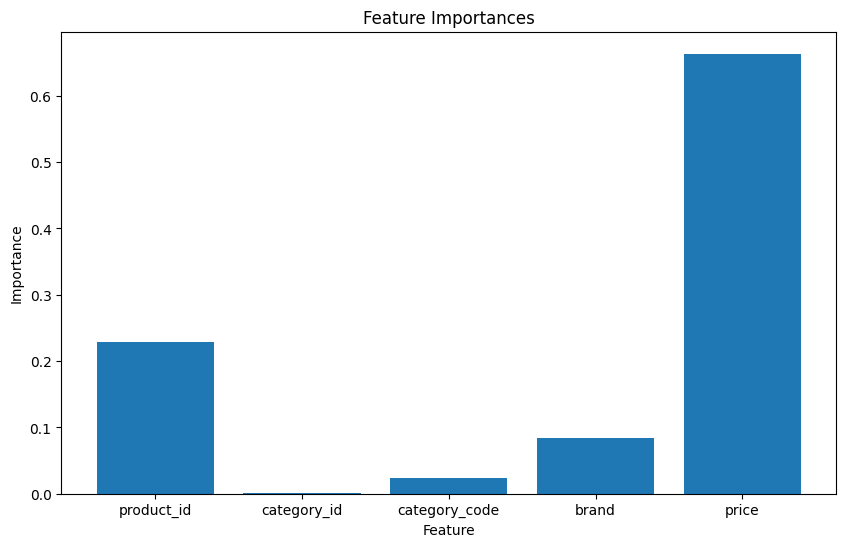

In [ ]:


# Preprocess the data
filtered_purchases_df['event_time'] = pd.to_datetime(filtered_purchases_df['event_time'])
filtered_purchases_df['hour'] = filtered_purchases_df['event_time'].dt.hour
filtered_purchases_df['day_of_week'] = filtered_purchases_df['event_time'].dt.dayofweek

# Encode categorical variables
label_encoders = {}
categorical_columns = ['event_type', 'category_code', 'brand']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    filtered_purchases_df[col] = label_encoders[col].fit_transform(filtered_purchases_df[col].astype(str))

# Prepare features and target variables
X = filtered_purchases_df[['product_id', 'category_id', 'category_code', 'brand', 'price']]
y = filtered_purchases_df[['hour', 'day_of_week']]

# Ensure X and y have the same number of samples
assert X.shape[0] == y.shape[0], "Mismatched number of samples between features and target variables."

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
hour_mae = mean_absolute_error(y_test.iloc[:, 0], y_pred[:, 0])
day_mae = mean_absolute_error(y_test.iloc[:, 1], y_pred[:, 1])

print(f'Mean Absolute Error for Hour: {hour_mae}')
print(f'Mean Absolute Error for Day of the Week: {day_mae}')

# Display feature importances
import matplotlib.pyplot as plt
import numpy as np

feature_importances = np.mean([
    tree.feature_importances_ for tree in model.estimators_[0].estimators_
], axis=0)

plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

# Initialize the model
base_model = RandomForestRegressor(random_state=42)
model = MultiOutputRegressor(base_model)

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation
hour_mae = mean_absolute_error(y_test.iloc[:, 0], y_pred[:, 0])
day_mae = mean_absolute_error(y_test.iloc[:, 1], y_pred[:, 1])

print(f'Optimized Mean Absolute Error for Hour: {hour_mae}')
print(f'Optimized Mean Absolute Error for Day of the Week: {day_mae}')


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Optimized Mean Absolute Error for Hour: 3.7782951742389823
Optimized Mean Absolute Error for Day of the Week: 1.5346108455649277


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
import json
import ast

# Preprocess the data
filtered_purchases_df['event_time'] = pd.to_datetime(filtered_purchases_df['event_time'])
filtered_purchases_df['hour'] = filtered_purchases_df['event_time'].dt.hour
filtered_purchases_df['day_of_week'] = filtered_purchases_df['event_time'].dt.dayofweek
filtered_purchases_df['day_of_month'] = filtered_purchases_df['event_time'].dt.day
filtered_purchases_df['week_of_month'] = filtered_purchases_df['event_time'].apply(lambda x: (x.day - 1) // 7 + 1)
filtered_purchases_df['is_weekend'] = filtered_purchases_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['event_type', 'category_code', 'brand']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    filtered_purchases_df[col] = label_encoders[col].fit_transform(filtered_purchases_df[col].astype(str))

# Prepare features and target variables
X = filtered_purchases_df[['product_id', 'category_id', 'category_code', 'brand', 'price', 'day_of_month', 'week_of_month', 'is_weekend']]
y = filtered_purchases_df[['hour', 'day_of_week']]

# Ensure X and y have the same number of samples
assert X.shape[0] == y.shape[0], "Mismatched number of samples between features and target variables."

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model and hyperparameter grid
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))

param_grid = {
    "estimator__n_estimators": [100, 200],
    "estimator__max_depth": [10, 20, None],
    "estimator__min_samples_split": [2, 5],
    "estimator__min_samples_leaf": [1, 2],
}

# Define the scorer
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)



<ipython-input-19-0b4f8022ac1a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchases_df['event_time'] = pd.to_datetime(filtered_purchases_df['event_time'])
<ipython-input-19-0b4f8022ac1a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchases_df['hour'] = filtered_purchases_df['event_time'].dt.hour
<ipython-input-19-0b4f8022ac1a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

Fitting 3 folds for each of 24 candidates, totalling 72 fits


<ipython-input-19-0b4f8022ac1a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchases_df[col] = label_encoders[col].fit_transform(filtered_purchases_df[col].astype(str))
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mean Absolute Error for Hour: 3.6942864183833044
Mean Absolute Error for Day of the Week: 0.26156060748104876


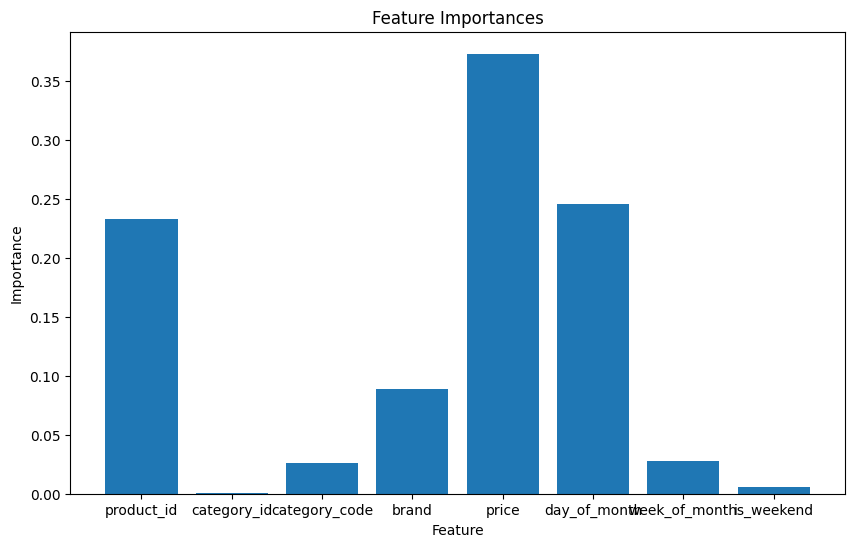

In [ ]:
# Evaluation
hour_mae = mean_absolute_error(y_test.iloc[:, 0], y_pred[:, 0])
day_mae = mean_absolute_error(y_test.iloc[:, 1], y_pred[:, 1])

print(f'Mean Absolute Error for Hour: {hour_mae}')
print(f'Mean Absolute Error for Day of the Week: {day_mae}')

# Display feature importances
import matplotlib.pyplot as plt
import numpy as np

feature_importances = np.mean([
    tree.feature_importances_ for tree in best_model.estimators_[0].estimators_
], axis=0)

plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, make_scorer, confusion_matrix, ConfusionMatrixDisplay
import json
import ast
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-23-d231f517b052>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchases_df['event_time'] = pd.to_datetime(filtered_purchases_df['event_time'])
<ipython-input-23-d231f517b052>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchases_df['hour'] = filtered_purchases_df['event_time'].dt.hour
<ipython-input-23-d231f517b052>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



Fitting 3 folds for each of 24 candidates, totalling 72 fits
Mean Absolute Error for Hour: 3.696761632701084
Mean Absolute Error for Day of the Week: 0.44758318797751295


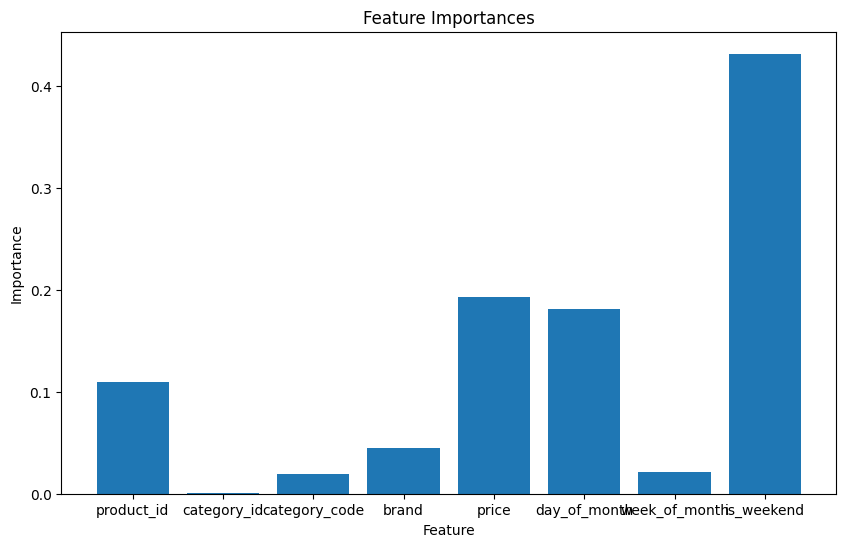

In [ ]:
# Preprocess the data
filtered_purchases_df['event_time'] = pd.to_datetime(filtered_purchases_df['event_time'])
filtered_purchases_df['hour'] = filtered_purchases_df['event_time'].dt.hour
filtered_purchases_df['day_of_week'] = filtered_purchases_df['event_time'].dt.dayofweek
filtered_purchases_df['day_of_month'] = filtered_purchases_df['event_time'].dt.day
filtered_purchases_df['week_of_month'] = filtered_purchases_df['event_time'].apply(lambda x: (x.day - 1) // 7 + 1)
filtered_purchases_df['is_weekend'] = filtered_purchases_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['event_type', 'category_code', 'brand']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    filtered_purchases_df[col] = label_encoders[col].fit_transform(filtered_purchases_df[col].astype(str))

# Prepare features and target variables
X = filtered_purchases_df[['product_id', 'category_id', 'category_code', 'brand', 'price', 'day_of_month', 'week_of_month', 'is_weekend']]
y = filtered_purchases_df[['hour', 'day_of_week']]

# Ensure X and y have the same number of samples
assert X.shape[0] == y.shape[0], "Mismatched number of samples between features and target variables."

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model and hyperparameter grid
model = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))

param_grid = {
    "estimator__n_estimators": [100, 200],
    "estimator__max_depth": [3, 5, 10],
    "estimator__min_samples_split": [2, 5],
    "estimator__min_samples_leaf": [1, 2],
}

# Define the scorer
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation
hour_mae = mean_absolute_error(y_test.iloc[:, 0], y_pred[:, 0])
day_mae = mean_absolute_error(y_test.iloc[:, 1], y_pred[:, 1])

print(f'Mean Absolute Error for Hour: {hour_mae}')
print(f'Mean Absolute Error for Day of the Week: {day_mae}')

# Display feature importances
feature_importances = np.mean([
    tree.feature_importances_ for tree in best_model.estimators_
], axis=0)

plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [ ]:
!pip install xgboost

<ipython-input-25-ae228c845e61>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchases_df['event_time'] = pd.to_datetime(filtered_purchases_df['event_time'])
<ipython-input-25-ae228c845e61>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchases_df['hour'] = filtered_purchases_df['event_time'].dt.hour
<ipython-input-25-ae228c845e61>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mean Absolute Error for Hour: 3.729045062502541
Mean Absolute Error for Day of the Week: 0.47041717399979455


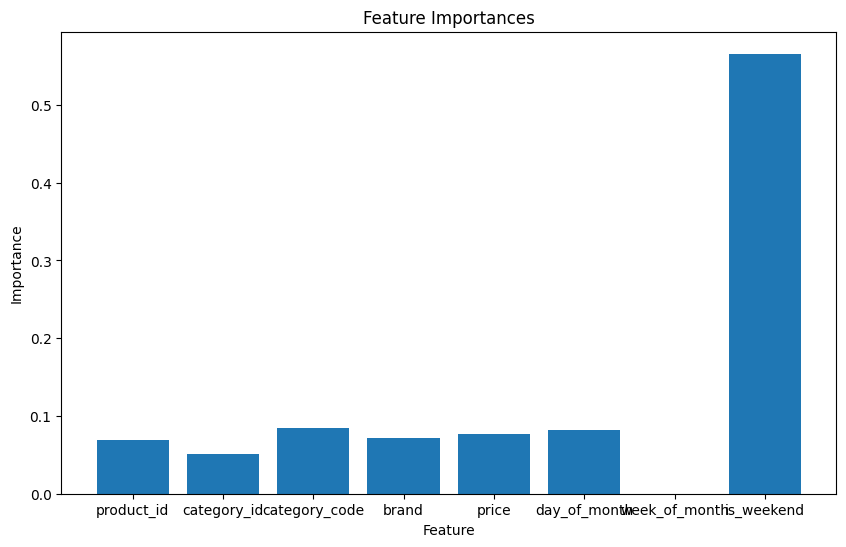

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, make_scorer, confusion_matrix, ConfusionMatrixDisplay
import json
import ast
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb


# Preprocess the data
filtered_purchases_df['event_time'] = pd.to_datetime(filtered_purchases_df['event_time'])
filtered_purchases_df['hour'] = filtered_purchases_df['event_time'].dt.hour
filtered_purchases_df['day_of_week'] = filtered_purchases_df['event_time'].dt.dayofweek
filtered_purchases_df['day_of_month'] = filtered_purchases_df['event_time'].dt.day
filtered_purchases_df['week_of_month'] = filtered_purchases_df['event_time'].apply(lambda x: (x.day - 1) // 7 + 1)
filtered_purchases_df['is_weekend'] = filtered_purchases_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['event_type', 'category_code', 'brand']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    filtered_purchases_df[col] = label_encoders[col].fit_transform(filtered_purchases_df[col].astype(str))

# Prepare features and target variables
X = filtered_purchases_df[['product_id', 'category_id', 'category_code', 'brand', 'price', 'day_of_month', 'week_of_month', 'is_weekend']]
y = filtered_purchases_df[['hour', 'day_of_week']]

# Ensure X and y have the same number of samples
assert X.shape[0] == y.shape[0], "Mismatched number of samples between features and target variables."

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model and hyperparameter grid for XGBoost
model = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror', random_state=42))

param_grid = {
    "estimator__n_estimators": [100, 200, 300],
    "estimator__max_depth": [3, 5, 7],
    "estimator__learning_rate": [0.01, 0.1, 0.2],
    "estimator__subsample": [0.7, 0.8, 0.9],
}

# Define the scorer
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation
hour_mae = mean_absolute_error(y_test.iloc[:, 0], y_pred[:, 0])
day_mae = mean_absolute_error(y_test.iloc[:, 1], y_pred[:, 1])

print(f'Mean Absolute Error for Hour: {hour_mae}')
print(f'Mean Absolute Error for Day of the Week: {day_mae}')

# Display feature importances
feature_importances = np.mean([
    tree.feature_importances_ for tree in best_model.estimators_
], axis=0)

plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


In [ ]:
!pip install xgboost
!pip install scikit-learn


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, make_scorer, confusion_matrix, ConfusionMatrixDisplay
import json
import ast
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb


# Preprocess the data
filtered_purchases_df['event_time'] = pd.to_datetime(filtered_purchases_df['event_time'])
filtered_purchases_df['hour'] = filtered_purchases_df['event_time'].dt.hour
filtered_purchases_df['day_of_week'] = filtered_purchases_df['event_time'].dt.dayofweek
filtered_purchases_df['day_of_month'] = filtered_purchases_df['event_time'].dt.day
filtered_purchases_df['week_of_month'] = filtered_purchases_df['event_time'].apply(lambda x: (x.day - 1) // 7 + 1)
filtered_purchases_df['is_weekend'] = filtered_purchases_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Adding lag features (previous hour sales)
filtered_purchases_df = filtered_purchases_df.sort_values(by='event_time')
filtered_purchases_df['prev_hour_sales'] = filtered_purchases_df.groupby('product_id')['price'].shift(1).fillna(0)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['event_type', 'category_code', 'brand']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    filtered_purchases_df[col] = label_encoders[col].fit_transform(filtered_purchases_df[col].astype(str))

# Prepare features and target variables
X = filtered_purchases_df[['product_id', 'category_id', 'category_code', 'brand', 'price', 'day_of_month', 'week_of_month', 'is_weekend', 'prev_hour_sales']]
y = filtered_purchases_df[['hour', 'day_of_week']]

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Ensure X and y have the same number of samples
assert X.shape[0] == y.shape[0], "Mismatched number of samples between features and target variables."

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model and hyperparameter grid for XGBoost
model = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror', random_state=42))

param_grid = {
    "estimator__n_estimators": [100, 200, 300],
    "estimator__max_depth": [3, 5, 7],
    "estimator__learning_rate": [0.01, 0.1, 0.2],
    "estimator__subsample": [0.7, 0.8, 0.9],
}

# Define the scorer
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation
hour_mae = mean_absolute_error(y_test.iloc[:, 0], y_pred[:, 0])
day_mae = mean_absolute_error(y_test.iloc[:, 1], y_pred[:, 1])

print(f'Mean Absolute Error for Hour: {hour_mae}')
print(f'Mean Absolute Error for Day of the Week: {day_mae}')



Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mean Absolute Error for Hour: 3.732687636026086
Mean Absolute Error for Day of the Week: 0.46277905439855316


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert predictions to the nearest integer for classification evaluation
y_test_class = y_test.round().astype(int)
y_pred_class = np.round(y_pred).astype(int)

# Confusion matrix for Day of the Week
cm_day = confusion_matrix(y_test_class.iloc[:, 1], y_pred_class[:, 1])
disp_day = ConfusionMatrixDisplay(confusion_matrix=cm_day, display_labels=range(7))
disp_day.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Day of the Week')
plt.show()

# Confusion matrix for Hour
cm_hour = confusion_matrix(y_test_class.iloc[:, 0], y_pred_class[:, 0])
disp_hour = ConfusionMatrixDisplay(confusion_matrix=cm_hour, display_labels=range(24))
disp_hour.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Hour')
plt.show()


ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of labels (7).

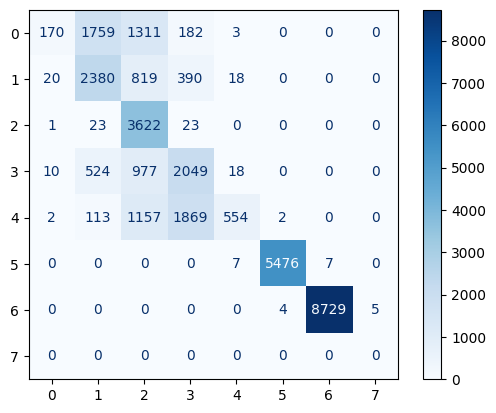

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert predictions to the nearest integer for classification evaluation
y_test_class = y_test.round().astype(int)
y_pred_class = np.round(y_pred).astype(int)

# Confusion matrix for Day of the Week
cm_day = confusion_matrix(y_test_class.iloc[:, 1], y_pred_class[:, 1])
disp_day = ConfusionMatrixDisplay(confusion_matrix=cm_day, display_labels=range(7))
disp_day.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Day of the Week')
plt.show()

# Confusion matrix for Hour
cm_hour = confusion_matrix(y_test_class.iloc[:, 0], y_pred_class[:, 0])
disp_hour = ConfusionMatrixDisplay(confusion_matrix=cm_hour, display_labels=range(24))
disp_hour.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Hour')
plt.show()
